# Brent Oil Price Analysis: Detecting Significant Events and Trends

This notebook analyzes historical Brent oil prices, identifies key change points using Bayesian and PELT algorithms, and interprets patterns in pricing data over time. 

---

## Step 1: Import Libraries and Functions

First, we import necessary libraries and load functions from our modular script `brent_oil_analysis.py`.


In [1]:
# Import libraries and functions from brent_oil_analysis.py
import pandas as pd
import sys, os
import warnings
warnings.filterwarnings('ignore')

In [2]:
sys.path.append(os.path.abspath('../scripts'))

In [3]:
from brent_oil_analysis import (
    load_and_preprocess,
    plot_price_trends,
    calculate_basic_statistics,
    bayesian_change_point_detection,
    pelt_change_point_detection,
    apply_arima
)

## Step 2: Load and Preprocess Data

The dataset contains daily prices of Brent oil from May 20, 1987, to September 30, 2022. In this step, we load the dataset and convert dates to a standard format, handle missing values with linear interpolation, and inspect the first few records.


In [4]:
# Load and preprocess data
file_path = r'C:\Users\Blen\OneDrive\Documents\10Academy\Week10\data\Copy of BrentOilPrices.csv' 
data = load_and_preprocess(file_path)
data.head()


2024-11-15 20:52:05,387 - INFO - Loading and preprocessing data.
2024-11-15 20:52:05,956 - INFO - Data loaded and missing values interpolated.


,Price
Date,
1987-05-20,18.63
1987-05-21,18.45
1987-05-22,18.55
1987-05-25,18.60
1987-05-26,18.63


## Step 3: Exploratory Data Analysis (EDA)

In this section, we visualize historical trends in Brent oil prices to observe patterns, seasonality, and anomalies. Visualizing these trends helps set a foundation for further statistical analysis.


2024-11-15 20:52:05,986 - INFO - Plotting price trends.


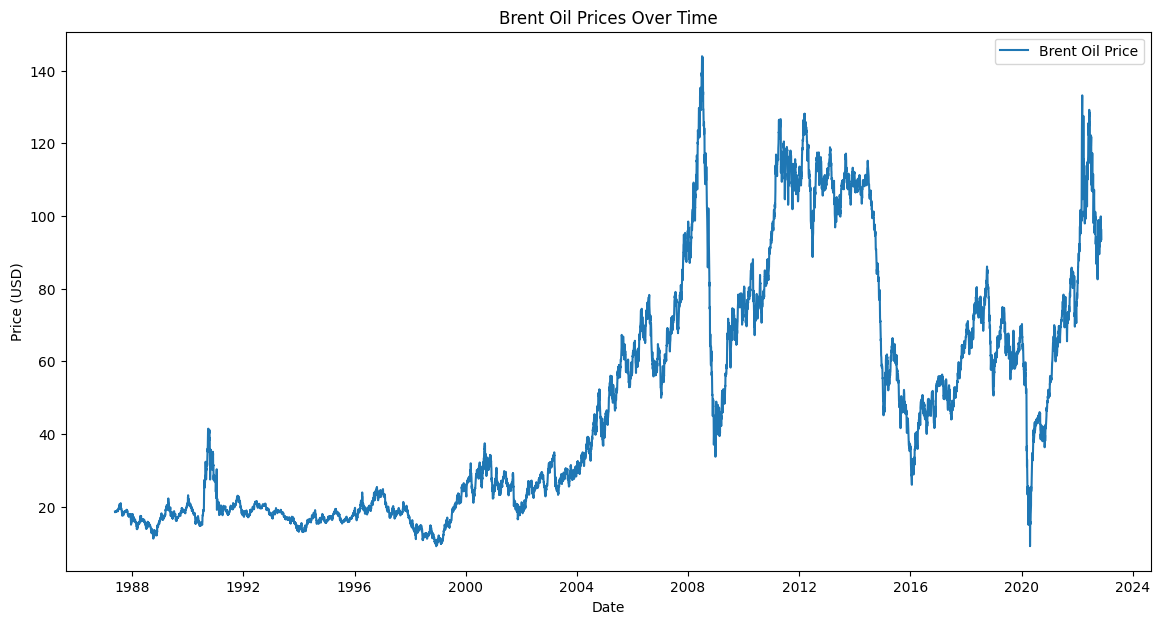

2024-11-15 20:52:06,386 - INFO - Price trend plot completed.


In [5]:
# Plot price trends
plot_price_trends(data)


## Step 4: Basic Statistics and Volatility

We calculate summary statistics (mean, median, standard deviation) and rolling volatility (using a 30-day window) to understand price behaviors over time.


2024-11-15 20:52:06,408 - INFO - Calculating basic statistics.
2024-11-15 20:52:06,419 - INFO - Mean price: 48.42078237709467
2024-11-15 20:52:06,426 - INFO - Median price: 38.57
2024-11-15 20:52:06,426 - INFO - Standard deviation of price: 32.86010995167221


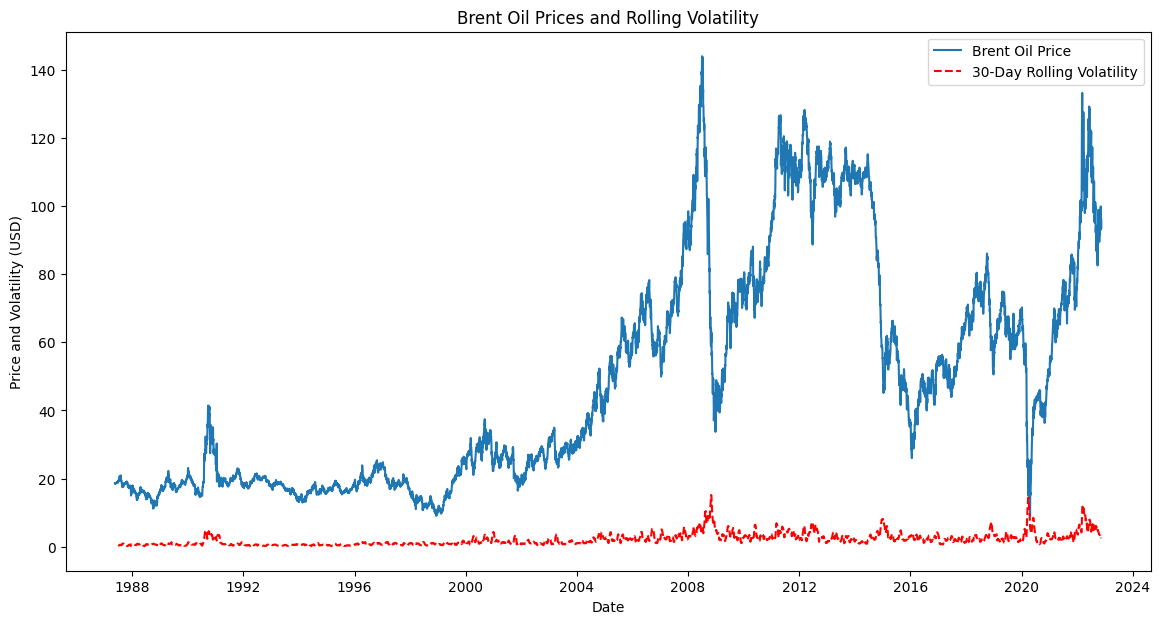

In [6]:
# Calculate statistics and volatility
mean_price, median_price, std_dev_price = calculate_basic_statistics(data)


### Brent Oil Price (blue line):
This line shows the historical fluctuations in the price of Brent oil over the years. We can observe significant peaks and dips, which likely correspond to major economic or geopolitical events impacting the oil market. For example:

### Early 1990s: 
The spike around this period could be related to the Gulf War.
### 2008:
A sharp peak and subsequent drop during the Global Financial Crisis.
### 2020:
A sudden dip likely tied to the COVID-19 pandemic and the corresponding economic slowdown.
### 30-Day Rolling Volatility (red dashed line):
Volatility measures the degree of variation in price, indicating periods of high or low uncertainty. Rolling volatility is computed over a 30-day window, giving a smoothed measure of how much prices fluctuated on average during the recent month. Higher peaks in this line correspond to times when prices were more volatile. The volatility spikes tend to align with periods of extreme price changes, such as during financial crises or major events in the oil market.

## Insights
Major events cause simultaneous spikes in both price and volatility, showing that instability in the market leads to both price fluctuations and increased uncertainty.
Periods of stable prices correspond with low volatility, indicating more predictable price movements when there are no major disruptions.

-- 

## Step 5: Change Point Detection Using PELT Algorithm

We apply the PELT (Pruned Exact Linear Time) algorithm to detect multiple change points based on the 'rbf' model, which captures local variance and is suitable for our time series data.


2024-11-15 20:52:06,707 - INFO - Starting PELT change point detection.


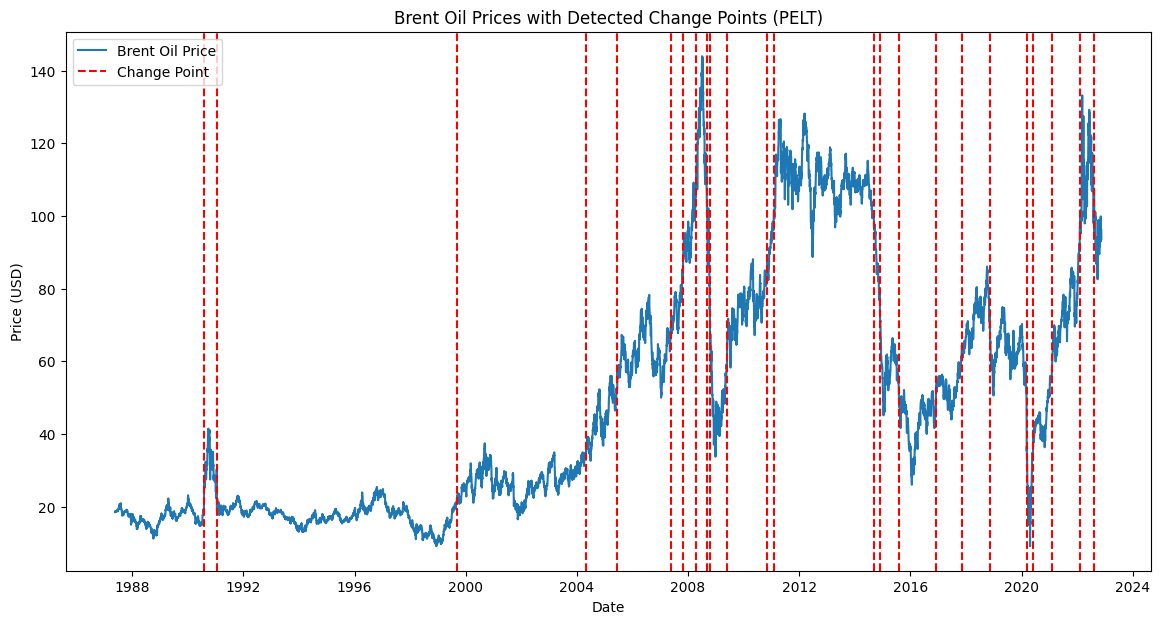

2024-11-15 20:53:15,902 - INFO - PELT change point detection completed.
2024-11-15 20:53:15,903 - INFO - Detected change points: [820, 935, 3120, 4310, 4600, 5090, 5200, 5315, 5415, 5445, 5600, 5960, 6030, 6925, 6985, 7155, 7495, 7735, 7995, 8330, 8385, 8560, 8815, 8940, 9011]


Detected Change Points (indices): [820, 935, 3120, 4310, 4600, 5090, 5200, 5315, 5415, 5445, 5600, 5960, 6030, 6925, 6985, 7155, 7495, 7735, 7995, 8330, 8385, 8560, 8815, 8940, 9011]


In [7]:
# Apply the PELT algorithm for change point detection
change_points = pelt_change_point_detection(data, penalty=15, model_type="rbf")
print("Detected Change Points (indices):", change_points)


### 5.1 Getting the key Dates based on the Indices

In [8]:
# Ensure no out-of-bounds indices
change_points = [cp for cp in change_points if cp < len(data)]

In [9]:
# Assuming `data` is your DataFrame with dates as index
change_points_dates = data.index[change_points]
print("Change Points (Dates):", change_points_dates)

Change Points (Dates): DatetimeIndex(['1990-08-06', '1991-01-16', '1999-09-07', '2004-05-04',
               '2005-06-16', '2007-05-18', '2007-10-24', '2008-04-11',
               '2008-09-03', '2008-10-15', '2009-05-29', '2010-11-01',
               '2011-02-10', '2014-09-08', '2014-12-02', '2015-08-04',
               '2016-11-30', '2017-11-07', '2018-11-15', '2020-03-09',
               '2020-05-29', '2021-02-03', '2022-02-04', '2022-08-04'],
              dtype='datetime64[ns]', name='Date', freq=None)


### 5.2 Organizing the dates and the events that happened at that time within a dataframe

In [10]:
import pandas as pd

# Define your data
data_events = {
    "Change Point (Date)": [
        "1990-08-06", "1991-01-16", "1999-09-07", "2004-05-04",
        "2005-06-16", "2007-05-18", "2007-10-24", "2008-04-11",
        "2008-09-03", "2008-10-15", "2009-05-29", "2010-11-01",
        "2011-02-10", "2014-09-08", "2014-12-02", "2015-08-04",
        "2016-11-30", "2017-11-07", "2018-11-15", "2020-03-09",
        "2020-05-29", "2021-02-03", "2022-02-04", "2022-08-04"
    ],
    "Major Event(s)": [
        "Iraq invades Kuwait leading to UN sanctions",
        "Operation Desert Storm begins with US-led coalition targeting Iraq",
        "Emerging market instability and non-OPEC production increases",
        "Post-Iraq invasion supply recovery issues",
        "Rapid industrialization of China and India increases demand",
        "OPEC struggles with high demand leading to sustained prices",
        "Oil prices surge due to Middle East tensions",
        "Financial crisis impact on oil demand and price volatility",
        "Oil prices start a steep decline with worsening global crisis",
        "Ongoing financial crisis drives further price drops",
        "Oil prices stabilize as economies start to recover",
        "Middle Eastern unrest affecting oil supply (pre-Arab Spring)",
        "Arab Spring disrupts oil production in Libya and other regions",
        "U.S. shale oil surge leads to oversupply concerns",
        "OPEC maintains production despite U.S. supply rise",
        "Economic concerns in China affect global oil demand",
        "OPEC and non-OPEC countries agree to cut production",
        "Internal instability in Saudi Arabia impacts oil prices",
        "Iran sanctions and U.S. shale growth increase supply concerns",
        "Price war amid COVID-19 lockdowns and Saudi-Russia dispute",
        "Gradual recovery in demand as lockdowns ease",
        "OPEC+ production cuts despite recovery signs",
        "Russia-Ukraine tensions raise oil supply concerns",
        "Economic slowdown worries due to inflation"
    ],
    "Category": [
        "Geopolitical", "Geopolitical", "Economic", "Supply-Demand", 
        "Supply-Demand", "Supply-Demand", "Geopolitical", "Economic",
        "Economic", "Economic", "Economic", "Geopolitical",
        "Geopolitical", "Supply-Demand", "Supply-Demand", "Economic",
        "Supply-Demand", "Geopolitical", "Supply-Demand", "Supply-Demand",
        "Economic", "Supply-Demand", "Geopolitical", "Economic"
    ]
}


In [11]:

# Convert to DataFrame
df_events = pd.DataFrame(data_events)

# Display the table
df_events.head(25)

,Change Point (Date),Major Event(s),Category
0,1990-08-06,Iraq invades Kuwait leading to UN sanctions,Geopolitical
1,1991-01-16,Operation Desert Storm begins with US-led coal...,Geopolitical
2,1999-09-07,Emerging market instability and non-OPEC produ...,Economic
3,2004-05-04,Post-Iraq invasion supply recovery issues,Supply-Demand
4,2005-06-16,Rapid industrialization of China and India inc...,Supply-Demand
5,2007-05-18,OPEC struggles with high demand leading to sus...,Supply-Demand
6,2007-10-24,Oil prices surge due to Middle East tensions,Geopolitical
7,2008-04-11,Financial crisis impact on oil demand and pric...,Economic
8,2008-09-03,Oil prices start a steep decline with worsenin...,Economic
9,2008-10-15,Ongoing financial crisis drives further price ...,Economic


In [15]:
df_events.to_csv("events.csv")

## Step 5: Bayesian Change Point Detection

In this section, we use Bayesian inference to detect potential change points, which may correspond to significant events that influenced oil prices.


2024-11-15 20:53:16,068 - INFO - Starting simplified Bayesian change point detection.


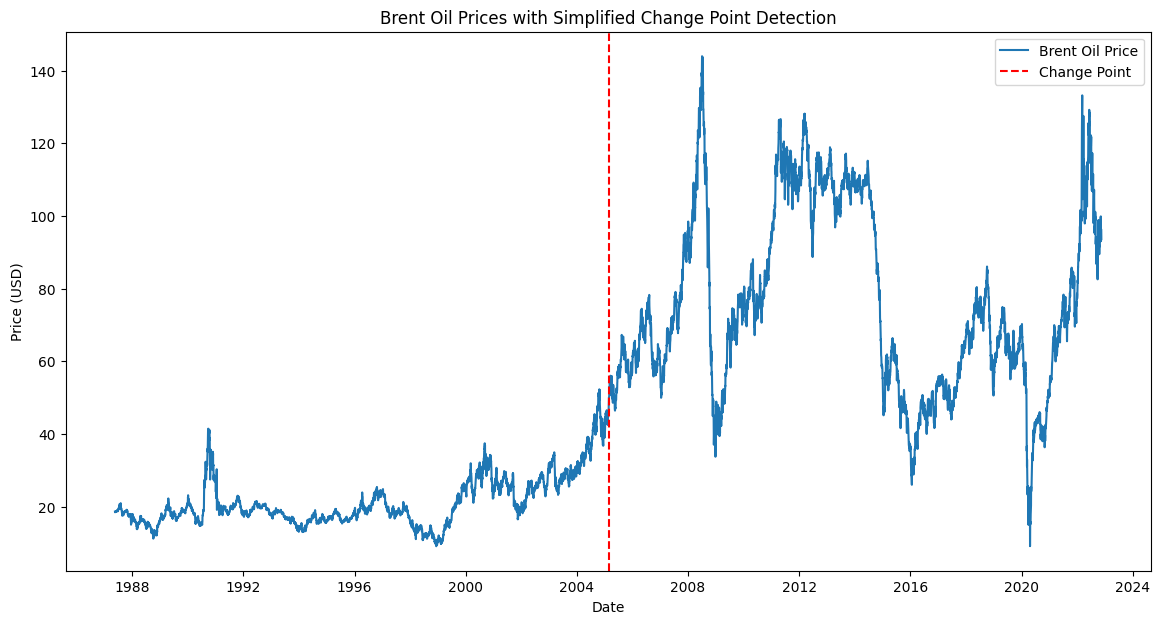

2024-11-15 20:53:16,351 - INFO - Simplified Bayesian change point detection completed. Change point detected at index 4520


np.int64(4520)

In [12]:
# Perform Bayesian change point detection
bayesian_change_point_detection(data, mean_price)

## Step 6: Time Series Modeling with ARIMA

The ARIMA (AutoRegressive Integrated Moving Average) model is applied to capture the underlying patterns and seasonality in Brent oil prices. We use this model to fit the historical data and analyze its forecasted values.


c:\Users\Blen\OneDrive\Desktop\10Academy\ChangePointAnalysis\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Blen\OneDrive\Desktop\10Academy\ChangePointAnalysis\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Blen\OneDrive\Desktop\10Academy\ChangePointAnalysis\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


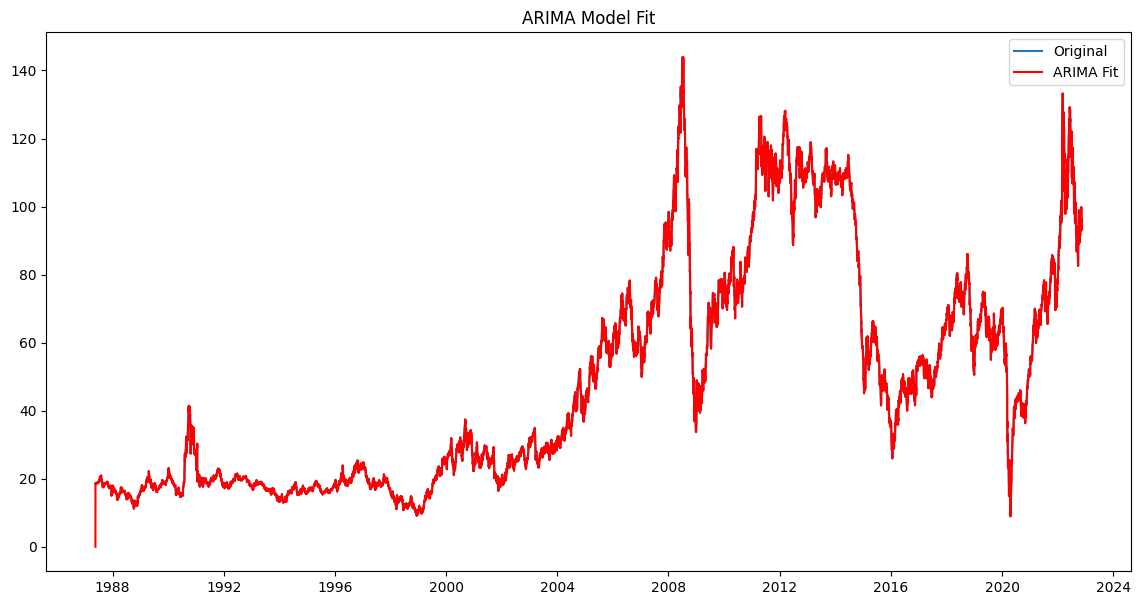

                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 9011
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -14543.950
Date:                Fri, 15 Nov 2024   AIC                          29093.899
Time:                        20:53:17   BIC                          29115.218
Sample:                             0   HQIC                         29101.153
                               - 9011                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3427      0.159     -2.152      0.031      -0.655      -0.031
ma.L1          0.3712      0.157      2.358      0.018       0.063       0.680
sigma2         1.4777      0.008    184.571      0.0

In [13]:
# Apply ARIMA model
arima_summary = apply_arima(data, order=(1, 1, 1))
print(arima_summary)


The output above shows the summary of the ARIMA model. This model captures both the short-term dependencies and the overall trend, helping us understand the time series behavior in Brent oil prices.

---

## Summary

This notebook provided an overview of Brent oil prices, calculated basic statistics, visualized volatility, exploratory analysis of Brent oil prices, identified change points through PELT algorithm, visualized significant shifts in price trends over time, and applied an ARIMA model to identify underlying patterns. These findings form the basis for further event-based analysis, linking price shifts to geopolitical and economic events.
